# MultinomialNB

In [16]:
#Cell # 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

file_path = 'SMSSpamCollection.txt'
df = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'text'])
df['label_encoded'] = df['label'].map({'ham': 0, 'spam': 1})





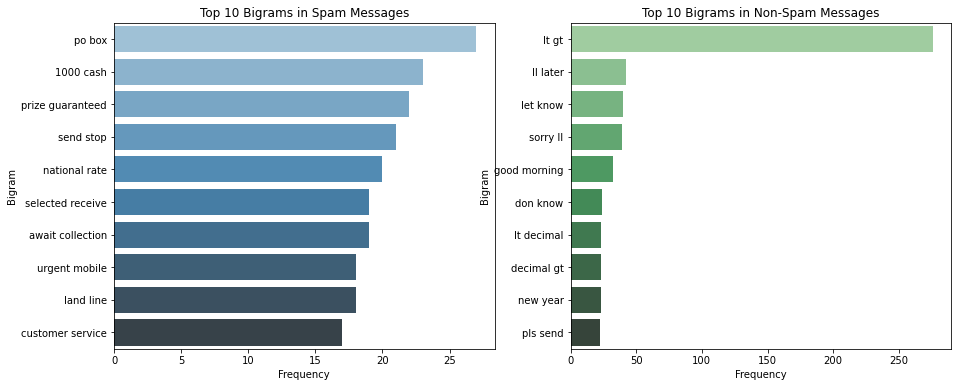

In [17]:
def Bigrams(corpus, n=2, top_n=10):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_word = vec.transform(corpus)
    sum_word = bag_of_word.sum(axis=0)
    word_freq = [(word, sum_word[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(word_freq, key=lambda x: x[1], reverse=True)[:top_n]

# Top 10 bigrams
spam = df[df['label'] == 'spam']['text']
non_spam = df[df['label'] == 'ham']['text']
spam_bigrams = Bigrams(spam, n=2, top_n=10)
non_spam_bigrams = Bigrams(non_spam, n=2, top_n=10)

# Converting to DataFrame for plotting
df_spam_bigrams = pd.DataFrame(spam_bigrams, columns=['Bigram', 'Frequency'])
df_non_spam_bigrams = pd.DataFrame(non_spam_bigrams, columns=['Bigram', 'Frequency'])

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Bigram', data=df_spam_bigrams, palette="Blues_d")
plt.title('Top 10 Bigrams in Spam Messages')

plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Bigram', data=df_non_spam_bigrams, palette="Greens_d")
plt.title('Top 10 Bigrams in Non-Spam Messages')

plt.show()

<Figure size 1080x432 with 0 Axes>

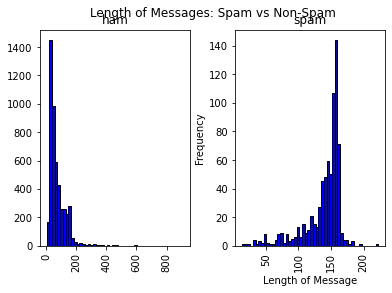

In [18]:
# Length of Messages
df['length'] = df['text'].apply(len)

# Plotting histograms
plt.figure(figsize=(15, 6))
df.hist(column='length', by='label', bins=50, layout=(1,2), color='blue', edgecolor='black')
plt.suptitle('Length of Messages: Spam vs Non-Spam')
plt.xlabel('Length of Message')
plt.ylabel('Frequency')
plt.show()

In [19]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix, df['label_encoded'], test_size=0.2, random_state=42)

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

# Calculate and print accuracy, precision, recall, and F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Confusion Matrix:
 [[966   0]
 [ 23 126]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 0.9794
Precision: 1.0000
Recall: 0.8456
F1-Score: 0.9164


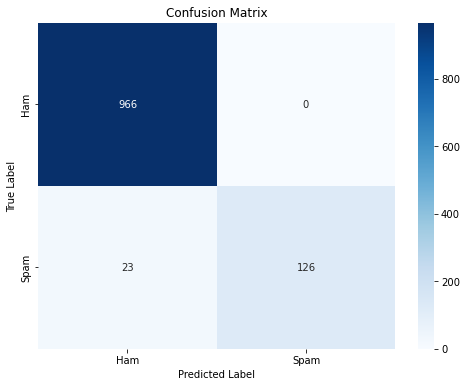

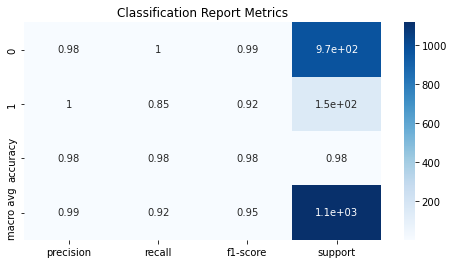

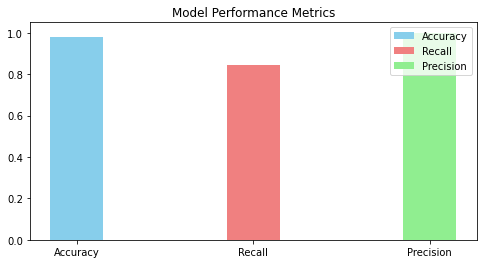

In [20]:
#Cell 2

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

classification_rep_df = pd.DataFrame(classification_report(
    y_test, y_pred, output_dict=True)).T
plt.figure(figsize=(8, 4))
sns.heatmap(classification_rep_df.iloc[:-1,
            :].astype(float), annot=True, cmap='Blues')
plt.title('Classification Report Metrics')
plt.show()

metrics = ['Accuracy', 'Recall', 'Precision']
values = [accuracy_score(y_test, y_pred),
          recall_score(y_test, y_pred),
          precision_score(y_test, y_pred)]

custom_colors = ['skyblue', 'lightcoral', 'lightgreen']  # Specify custom colors here

bar_width = 0.3  # Adjust this value to control the width of the bars

fig, ax = plt.subplots(figsize=(8, 4))

for i, (metric, value) in enumerate(zip(metrics, values)):
    ax.bar(i, value, width=bar_width, label=metric, color=custom_colors[i])

ax.set_xticks(range(len(metrics)))
ax.set_xticklabels(metrics)
ax.set_title('Model Performance Metrics')
ax.legend()

plt.show()

*hyperparameter tuning for the Multinomial Naive Bayes classifier*

In [21]:
# Cell 3

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # You can adjust these values based on your needs
}

# Create a Multinomial Naive Bayes classifier
naive_bayes = MultinomialNB()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the final model
best_naive_bayes = grid_search.best_estimator_
best_naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_naive_bayes.predict(X_test)

# Print the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Tuned Confusion Matrix:\n", conf_matrix)
print("\nTuned Classification Report:\n", classification_rep)

# Calculate and print accuracy, precision, recall, and F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Tuned Accuracy: {accuracy:.4f}")
print(f"Tuned Precision: {precision:.4f}")
print(f"Tuned Recall: {recall:.4f}")
print(f"Tuned F1-Score: {f1:.4f}")


Best Hyperparameters: {'alpha': 0.1}
Tuned Confusion Matrix:
 [[956  10]
 [  6 143]]

Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.93      0.96      0.95       149

    accuracy                           0.99      1115
   macro avg       0.96      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Tuned Accuracy: 0.9857
Tuned Precision: 0.9346
Tuned Recall: 0.9597
Tuned F1-Score: 0.9470


*PLOTS for hyperparameter tuning for the Multinomial Naive Bayes classifier*

Best Hyperparameters: {'alpha': 0.1}


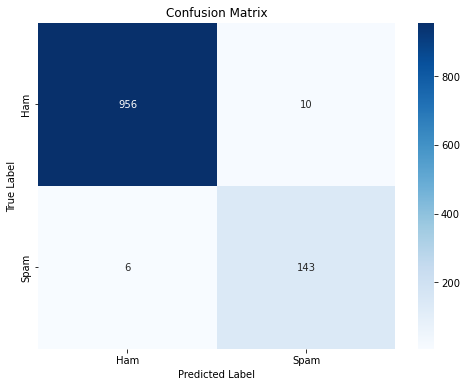

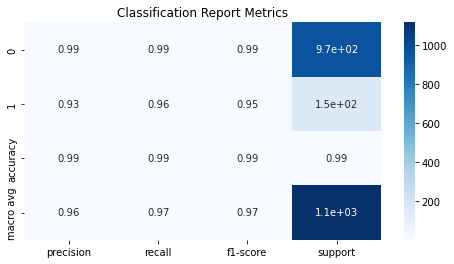

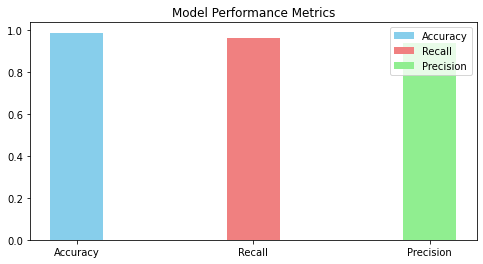

In [22]:
# Cell 4

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the final model
best_naive_bayes = grid_search.best_estimator_
best_naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_naive_bayes.predict(X_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot the classification report metrics
classification_rep_df = pd.DataFrame(classification_report(
    y_test, y_pred, output_dict=True)).T
plt.figure(figsize=(8, 4))
sns.heatmap(classification_rep_df.iloc[:-1,
            :].astype(float), annot=True, cmap='Blues')
plt.title('Classification Report Metrics')
plt.show()

# Plot the model performance metrics
metrics = ['Accuracy', 'Recall', 'Precision']
values = [accuracy_score(y_test, y_pred),
          recall_score(y_test, y_pred),
          precision_score(y_test, y_pred)]

custom_colors = ['skyblue', 'lightcoral', 'lightgreen']  # Specify custom colors here

bar_width = 0.3  # Adjust this value to control the width of the bars

fig, ax = plt.subplots(figsize=(8, 4))

for i, (metric, value) in enumerate(zip(metrics, values)):
    ax.bar(i, value, width=bar_width, label=metric, color=custom_colors[i])

ax.set_xticks(range(len(metrics)))
ax.set_xticklabels(metrics)
ax.set_title('Model Performance Metrics')
ax.legend()

plt.show()


Generating learning curve...


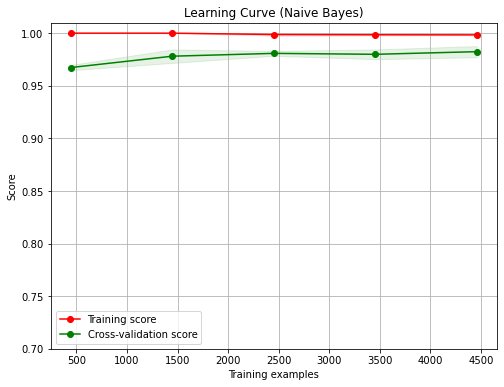

Learning curve generated and plotted.


In [23]:
# Function to plot the learning curve
def plot_learning_curve(estimator, X, y, title, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    

    print("Generating learning curve...")
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    print("Learning curve generated and plotted.")


# Plot the learning curve
plot_learning_curve(best_naive_bayes, tfidf_matrix, df['label_encoded'], title="Learning Curve (Naive Bayes)",
                    ylim=(0.7, 1.01), cv=5, n_jobs=-1)


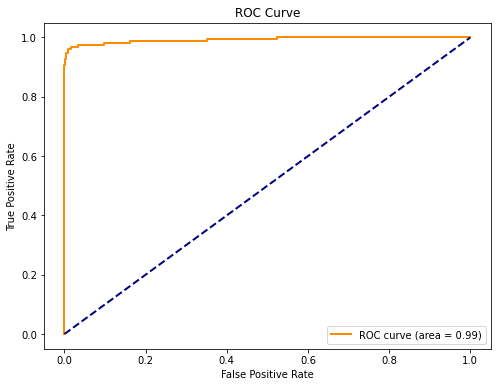

In [24]:
# Cell 5

# Use the best hyperparameters to train the final model
best_naive_bayes = grid_search.best_estimator_
best_naive_bayes.fit(X_train, y_train)

# Make predictions and probability predictions on the test set
y_pred = best_naive_bayes.predict(X_test)
y_pred_prob = best_naive_bayes.predict_proba(X_test)[:, 1]

# Plot the ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Random Forest

In [25]:
# Cell 6
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

# Evaluate Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print Evaluation Metrics for Random Forest
print("Random Forest - Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest - Classification Report:\n", classification_rep_rf)

# Additional Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - Precision: {precision_rf:.4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")
print(f"Random Forest - F1 Score: {f1_score_rf:.4f}")


Random Forest - Confusion Matrix:
 [[966   0]
 [ 22 127]]

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Random Forest - Accuracy: 0.9803
Random Forest - Precision: 1.0000
Random Forest - Recall: 0.8523
Random Forest - F1 Score: 0.9203


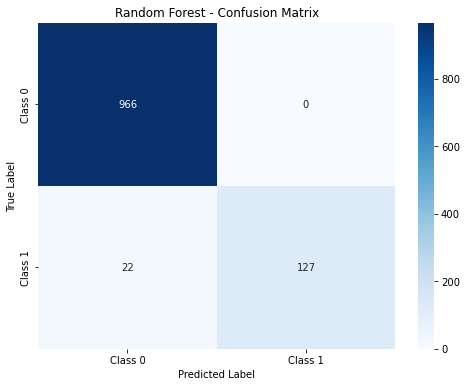

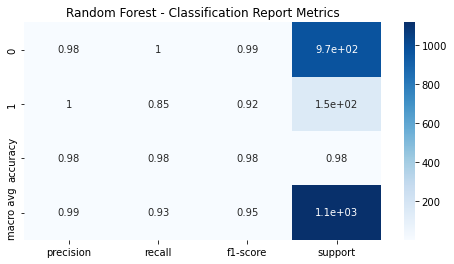

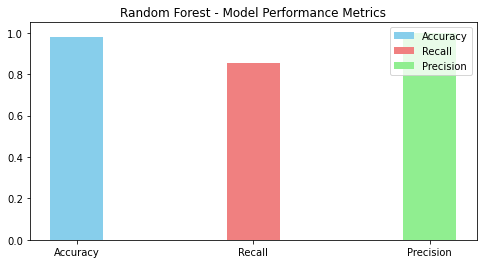

In [26]:
# Cell 7

# Random Forest Evaluation Metrics Plots
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest - Confusion Matrix')
plt.show()

# Classification Report
classification_rep_rf_df = pd.DataFrame(classification_report(
    y_test, y_pred_rf, output_dict=True)).T
plt.figure(figsize=(8, 4))
sns.heatmap(classification_rep_rf_df.iloc[:-1,
            :].astype(float), annot=True, cmap='Blues')
plt.title('Random Forest - Classification Report Metrics')
plt.show()

# Model Performance Metrics for Random Forest
metrics_rf = ['Accuracy', 'Recall', 'Precision']
values_rf = [accuracy_rf, recall_rf, precision_rf]

plt.figure(figsize=(8, 4))
for i, (metric, value) in enumerate(zip(metrics_rf, values_rf)):
    plt.bar(i, value, width=bar_width, label=metric, color=custom_colors[i])

plt.xticks(range(len(metrics_rf)), metrics_rf)
plt.title('Random Forest - Model Performance Metrics')
plt.legend()
plt.show()


*hyperparameter tuning for the RandomForestClassifier*

In [27]:
# Cell 8

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a random forest classifier
random_forest = RandomForestClassifier()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    random_forest,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings sampled
    cv=5,  # Number of folds in cross-validation
    scoring='accuracy',  # Evaluation metric
    n_jobs=-1,  # Use all available processors
    random_state=42
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best estimator for prediction
best_random_forest = random_search.best_estimator_
y_pred_rf_tuned = best_random_forest.predict(X_test)

# Evaluate the tuned Random Forest
conf_matrix_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
classification_rep_rf_tuned = classification_report(y_test, y_pred_rf_tuned)

# Print Evaluation Metrics for the tuned Random Forest
print("Tuned Random Forest - Confusion Matrix:\n", conf_matrix_rf_tuned)
print("\nTuned Random Forest - Classification Report:\n", classification_rep_rf_tuned)

# Additional Metrics for the tuned Random Forest
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf_tuned = precision_score(y_test, y_pred_rf_tuned)
recall_rf_tuned = recall_score(y_test, y_pred_rf_tuned)
f1_score_rf_tuned = 2 * (precision_rf_tuned * recall_rf_tuned) / (precision_rf_tuned + recall_rf_tuned)

print(f"Tuned Random Forest - Accuracy: {accuracy_rf_tuned:.4f}")
print(f"Tuned Random Forest - Precision: {precision_rf_tuned:.4f}")
print(f"Tuned Random Forest - Recall: {recall_rf_tuned:.4f}")
print(f"Tuned Random Forest - F1 Score: {f1_score_rf_tuned:.4f}")


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
Tuned Random Forest - Confusion Matrix:
 [[965   1]
 [ 18 131]]

Tuned Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.88      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Tuned Random Forest - Accuracy: 0.9830
Tuned Random Forest - Precision: 0.9924
Tuned Random Forest - Recall: 0.8792
Tuned Random Forest - F1 Score: 0.9324


*PLOTS for hyperparameter tuning for the RandomForestClassifier*

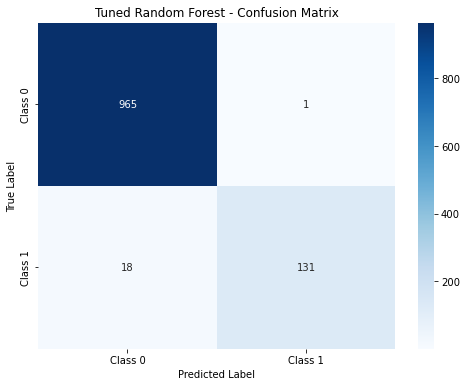

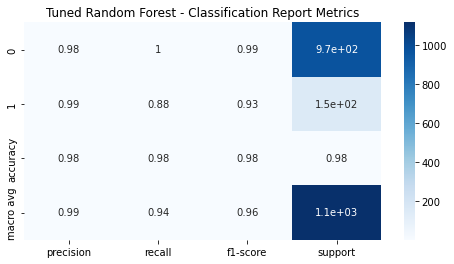

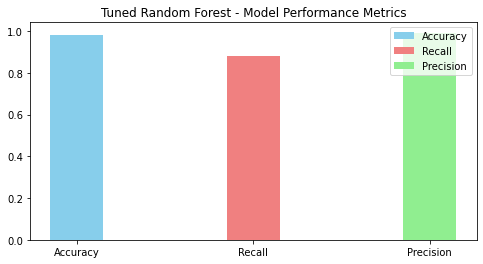

In [28]:
# Cell 9

# Random Forest Evaluation Metrics Plots
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Tuned Random Forest - Confusion Matrix')
plt.show()

# Classification Report
classification_rep_rf_tuned_df = pd.DataFrame(classification_report(
    y_test, y_pred_rf_tuned, output_dict=True)).T
plt.figure(figsize=(8, 4))
sns.heatmap(classification_rep_rf_tuned_df.iloc[:-1,
            :].astype(float), annot=True, cmap='Blues')
plt.title('Tuned Random Forest - Classification Report Metrics')
plt.show()

# Model Performance Metrics for Random Forest
metrics_rf_tuned = ['Accuracy', 'Recall', 'Precision']
values_rf_tuned = [accuracy_rf_tuned, recall_rf_tuned, precision_rf_tuned]

plt.figure(figsize=(8, 4))
for i, (metric, value) in enumerate(zip(metrics_rf_tuned, values_rf_tuned)):
    plt.bar(i, value, width=bar_width, label=metric, color=custom_colors[i])

plt.xticks(range(len(metrics_rf_tuned)), metrics_rf_tuned)
plt.title('Tuned Random Forest - Model Performance Metrics')
plt.legend()
plt.show()

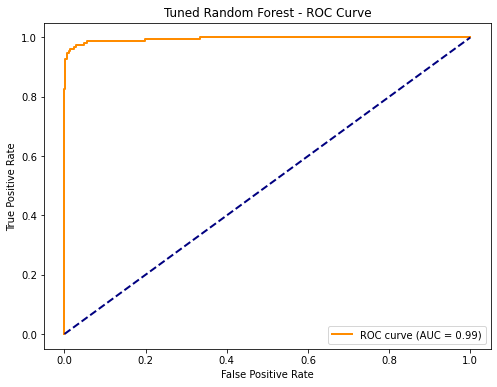

In [29]:
# Cell 10

# Get the predicted probabilities for the positive class
y_prob_rf_tuned = best_random_forest.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf_tuned)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Random Forest - ROC Curve')
plt.legend(loc="lower right")
plt.show()

Generating Random Forest learning curve...


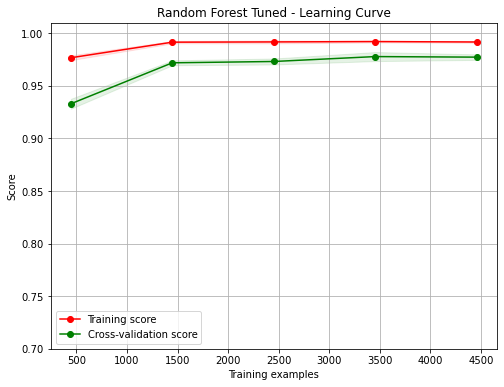

Random Forest learning curve generated and plotted.


In [30]:
# Cell 11

# Function to plot the learning curve for Random Forest
def plot_learning_curve_rf(estimator, X, y, title, ylim=None, cv=None,
                            n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    print("Generating Random Forest learning curve...")
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    print("Random Forest learning curve generated and plotted.")


# Plot the learning curve for the tuned Random Forest
plot_learning_curve_rf(best_random_forest, tfidf_matrix, df['label_encoded'],
                       title="Random Forest Tuned - Learning Curve",
                       ylim=(0.7, 1.01), cv=5, n_jobs=-1)
